In [1]:
import os 
import glob as glob
import pickle as pkl
from matplotlib import pyplot as plt
import numpy as np
import h5py

In [2]:
checkpoint_path = 'data/ellipse_20210608'
results_folder = sorted(glob.glob(os.path.join(checkpoint_path,'Students','HDT','*','')),key=os.path.getmtime)[-1]
with open(os.path.join(results_folder,'accuracy_data.pkl'),'rb') as f:
    ell_train_accs,ell_val_accs = pkl.load(f)
perf_files = sorted(glob.glob(os.path.join(results_folder,'*balanced_rewards*.h5')),key=os.path.getmtime)
perf = []
for i in range(len(perf_files)):
    with h5py.File(perf_files[i],'r') as f:
        perf.append(f['ep_rewards'][:])
ell_perf = np.array(perf)
with h5py.File(os.path.join(results_folder,'dqn_reward.h5'),'r') as f:
    ell_dqn_perf = f['ep_rewards'][:]

checkpoint_path = 'data/square_20210608'
results_folder = sorted(glob.glob(os.path.join(checkpoint_path,'Students','HDT','*','')),key=os.path.getmtime)[-1]
with open(os.path.join(results_folder,'accuracy_data.pkl'),'rb') as f:
    sq_train_accs,sq_val_accs = pkl.load(f)
perf_files = sorted(glob.glob(os.path.join(results_folder,'*balanced_rewards*.h5')),key=os.path.getmtime)
perf = []
for i in range(len(perf_files)):
    with h5py.File(perf_files[i],'r') as f:
        perf.append(f['ep_rewards'][:])
sq_perf = np.array(perf)
with h5py.File(os.path.join(results_folder,'dqn_reward.h5'),'r') as f:        
    sq_dqn_perf = f['ep_rewards'][:]

checkpoint_path = 'data/zigzag_20210608'
results_folder = sorted(glob.glob(os.path.join(checkpoint_path,'Students','HDT','*','')),key=os.path.getmtime)[-1]
with open(os.path.join(results_folder,'accuracy_data.pkl'),'rb') as f:
    zig_train_accs,zig_val_accs = pkl.load(f)
perf_files = sorted(glob.glob(os.path.join(results_folder,'*balanced_rewards*.h5')),key=os.path.getmtime)
perf = []
for i in range(len(perf_files)):
    with h5py.File(perf_files[i],'r') as f:
        perf.append(f['ep_rewards'][:])
zig_perf = np.array(perf)
with h5py.File(os.path.join(results_folder,'dqn_reward.h5'),'r') as f:        
    zig_dqn_perf = f['ep_rewards'][:]

checkpoint_path = 'data/cycle_tracks_20210609'
results_folder = sorted(glob.glob(os.path.join(checkpoint_path,'Students','HDT','*','')),key=os.path.getmtime)[-1]
with open(os.path.join(results_folder,'accuracy_data.pkl'),'rb') as f:
    cycle_train_accs,cycle_val_accs = pkl.load(f)
perf_files = sorted(glob.glob(os.path.join(results_folder,'*balanced_rewards*.h5')),key=os.path.getmtime)
perf = []
for i in range(len(perf_files)):
    with h5py.File(perf_files[i],'r') as f:
        perf.append(np.mean(f['ep_rewards'][:]))
cycle_perf = np.array(perf)
with h5py.File(os.path.join(results_folder,'dqn_reward.h5'),'r') as f:        
    cycle_dqn_perf = np.mean(f['ep_rewards'][:])
#results_folder

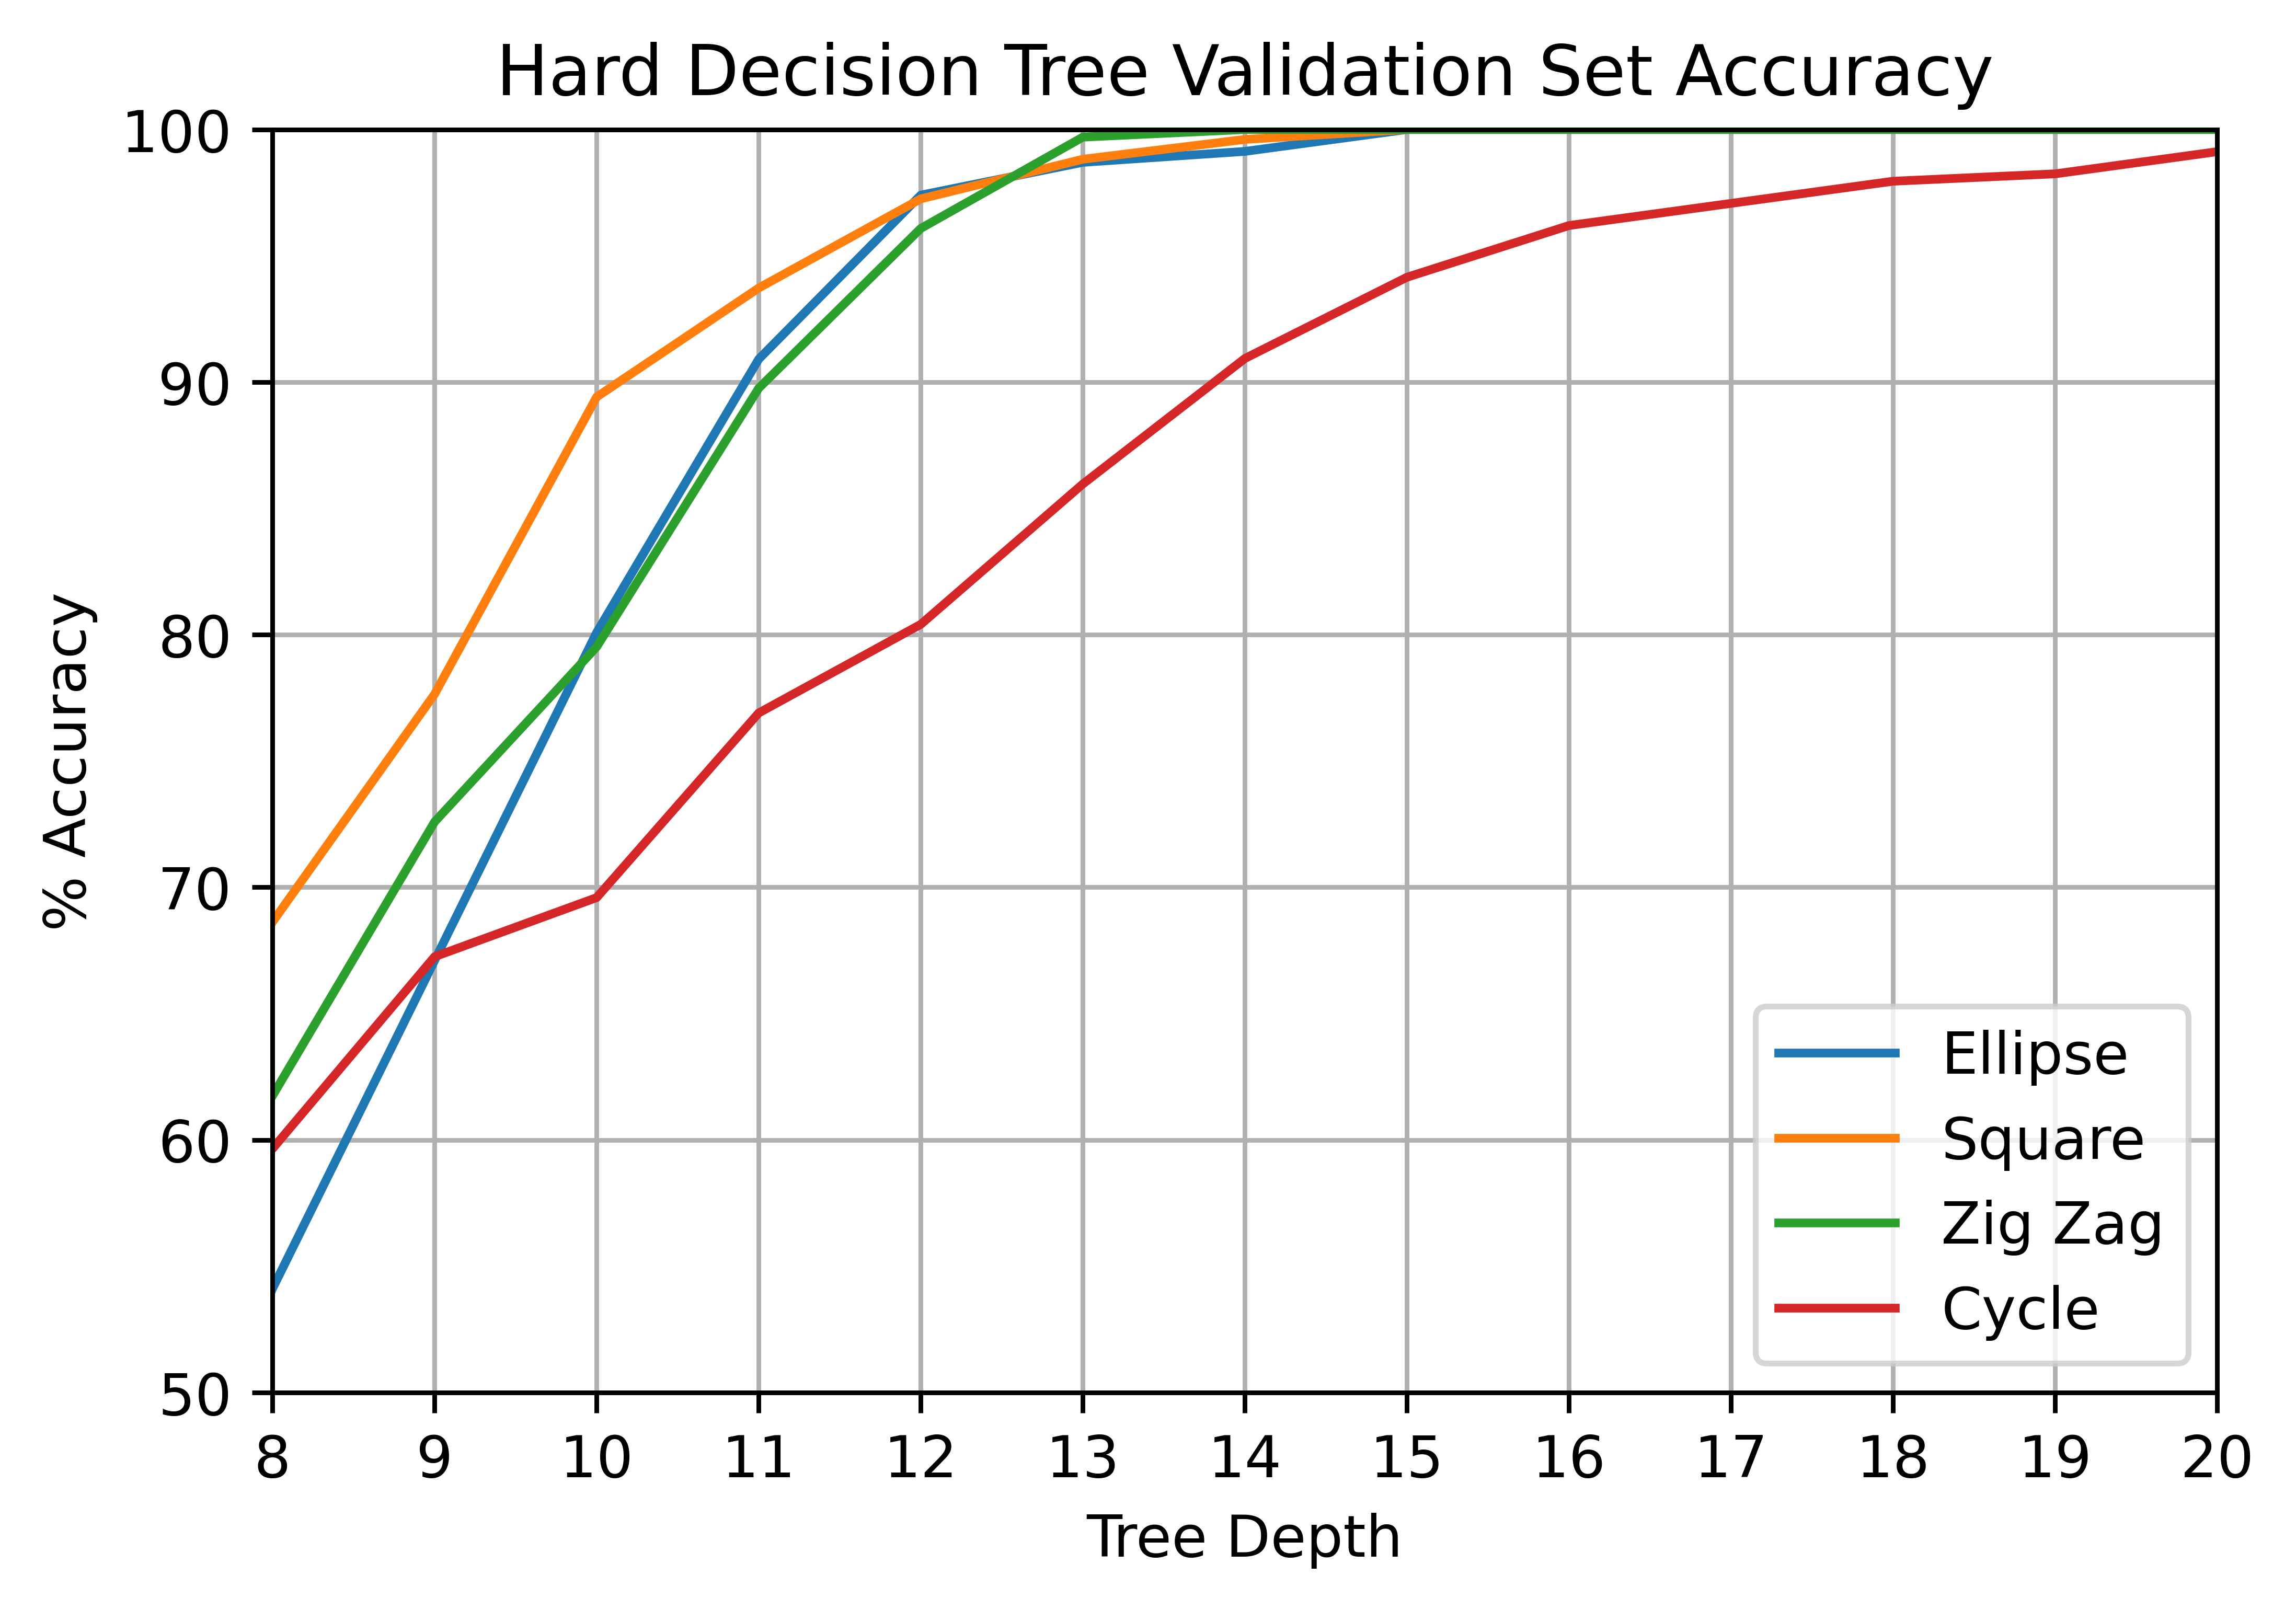

In [3]:
plt.figure(dpi=800)
tree_depths = np.array(range(2,21))
plt.plot(tree_depths,np.array(ell_val_accs)*100,label='Ellipse')
plt.plot(tree_depths,np.array(sq_val_accs)*100,label='Square')
plt.plot(tree_depths,np.array(zig_val_accs)*100,label='Zig Zag')
plt.plot(tree_depths,np.array(cycle_val_accs)*100,label='Cycle')
# plt.scatter(tree_depths,np.array(ell_val_accs)*100,label='Ellipse')
# plt.scatter(tree_depths,np.array(sq_val_accs)*100,label='Square')
# plt.scatter(tree_depths,np.array(zig_val_accs)*100,label='Zig Zag')
plt.xticks(tree_depths)
plt.xlabel('Tree Depth')
plt.ylabel('% Accuracy')
plt.xlim((8,20))
plt.ylim((50,100))
plt.legend()
plt.grid()
plt.title('Hard Decision Tree Validation Set Accuracy')
fig_savepath = os.path.join('data/Combined Plots','HDT Car Racing Accuracy.jpg')
plt.savefig(fig_savepath)

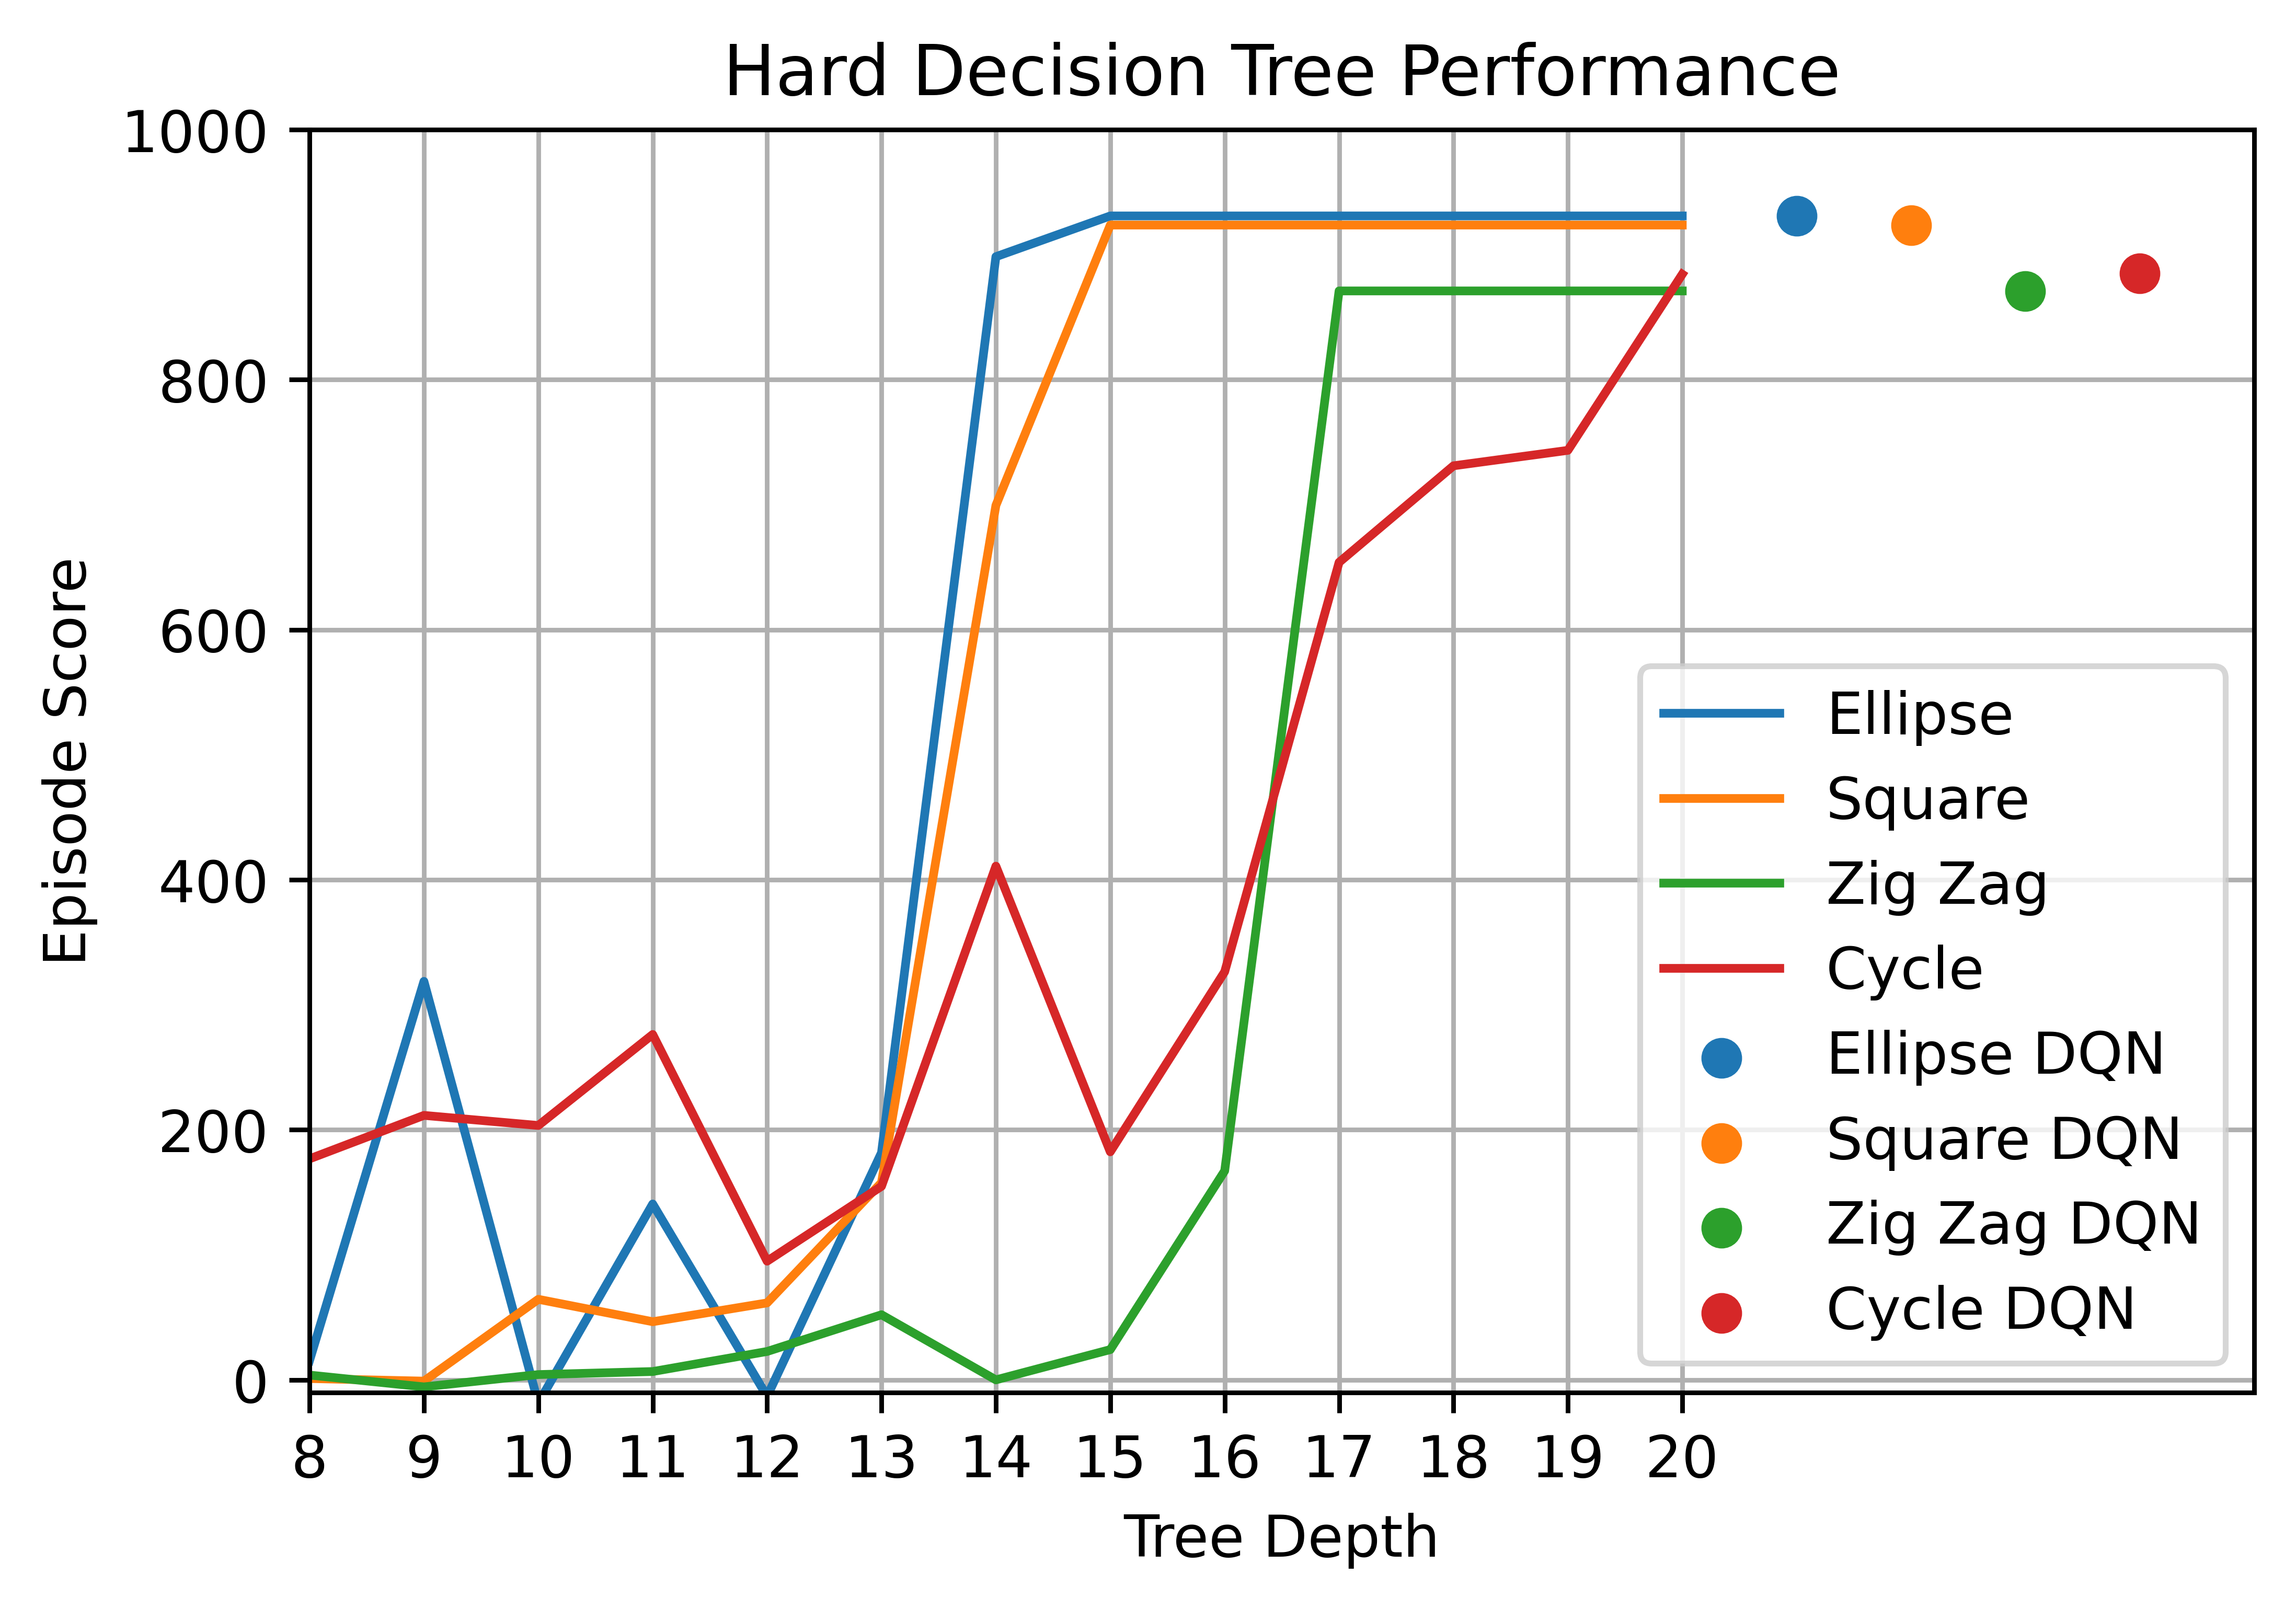

In [10]:
plt.figure(dpi=800)
tree_depths = np.array(range(8,21))
plt.plot(tree_depths,ell_perf,label='Ellipse')
plt.plot(tree_depths,sq_perf,label='Square')
plt.plot(tree_depths,zig_perf,label='Zig Zag')
plt.plot(tree_depths,cycle_perf,label='Cycle')
plt.scatter(tree_depths[-1]+1,ell_dqn_perf,label='Ellipse DQN')
plt.scatter(tree_depths[-1]+2,sq_dqn_perf,label='Square DQN')
plt.scatter(tree_depths[-1]+3,zig_dqn_perf,label='Zig Zag DQN')
plt.scatter(tree_depths[-1]+4,cycle_dqn_perf,label='Cycle DQN')

# plt.scatter(tree_depths,ell_perf,label='Ellipse')
# plt.scatter(tree_depths,sq_perf,label='Square')
# plt.scatter(tree_depths,zig_perf,label='Zig Zag')
# plt.scatter(tree_depths,cycle_perf,label='Cycle')
plt.xticks(tree_depths)
plt.xlabel('Tree Depth')
plt.ylabel('Episode Score')
plt.xlim((8,25))
plt.ylim((-10,1000))
plt.legend()
plt.grid()
plt.title('Hard Decision Tree Performance')
fig_savepath = os.path.join('data/Combined Plots','HDT Car Racing Performance.jpg')
plt.savefig(fig_savepath)